<a href="https://colab.research.google.com/github/astrrr/quant-lab/blob/main/lab_py_fin_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

# Variance ความแปรปรวน

In [2]:
system_a = (21, 19, 22, 18, 20)
system_b = (55, -15, -25, 55, 30)

In [3]:
print(f"mean of A: {np.mean(system_a)}")
print(f"mean of B: {np.mean(system_b)}")

mean of A: 20.0
mean of B: 20.0


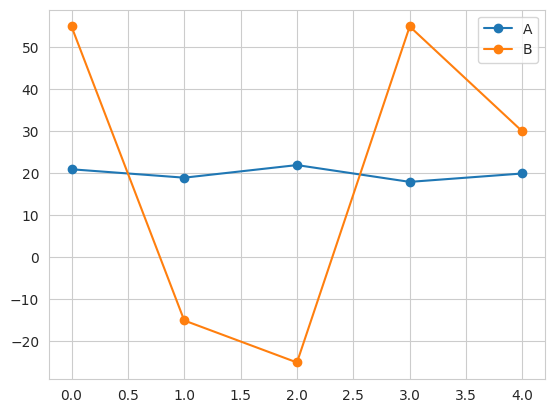

In [4]:
plt.plot(system_a, label="A", marker="o")
plt.plot(system_b, label="B", marker="o")
plt.legend()
plt.show()

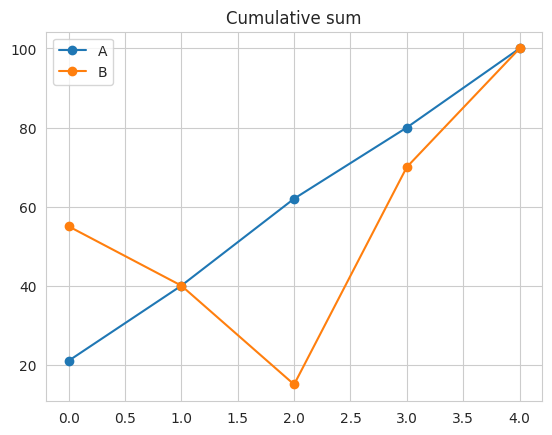

In [5]:
plt.plot(np.cumsum(system_a), label="A", marker="o")
plt.plot(np.cumsum(system_b), label="B", marker="o")
plt.title("Cumulative sum")
plt.legend()
plt.show()

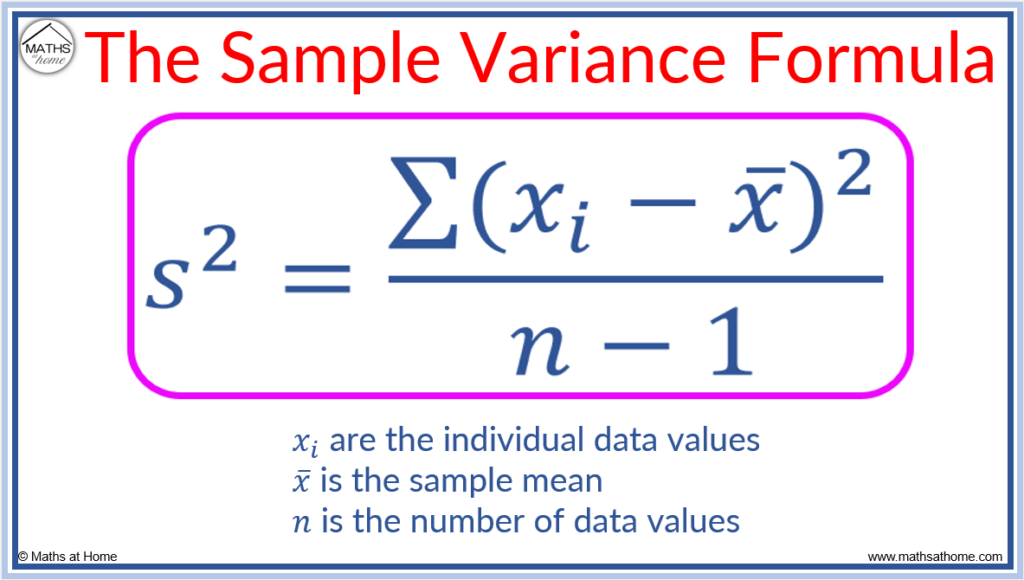

In [6]:
# for loop version
sum_v = 0

for i in range(len(system_a)):
  diff = (system_a[i] - np.mean(system_a)) **2
  sum_v += diff
  print(i)

print(f"len: {len(system_a)}")
print(f"sum diff: {sum_v}")
print(f"variance: {sum_v/len(system_a)}")  #len ของ data ค่อนข้างน้อย เลยยังไม่ -1

0
1
2
3
4
len: 5
sum diff: 10.0
variance: 2.0


In [7]:
# for loop version
sum_v = 0

for i in range(len(system_b)):
  diff = (system_b[i] - np.mean(system_b)) **2
  sum_v += diff
  print(i)

print(f"len: {len(system_b)}")
print(f"sum diff: {sum_v}")
print(f"variance: {sum_v/len(system_b)}")  #len ของ data ค่อนข้างน้อย เลยยังไม่ -1

0
1
2
3
4
len: 5
sum diff: 5800.0
variance: 1160.0


In [8]:
#Vectorization version

np.sum((system_a - np.mean(system_a))**2)/len(system_a)

2.0

In [9]:
np.sum((system_b - np.mean(system_b))**2)/len(system_b)

1160.0

In [10]:
#np built-in

np.var(system_a)

2.0

In [11]:
np.var(system_b)

1160.0

# Standard Deviation

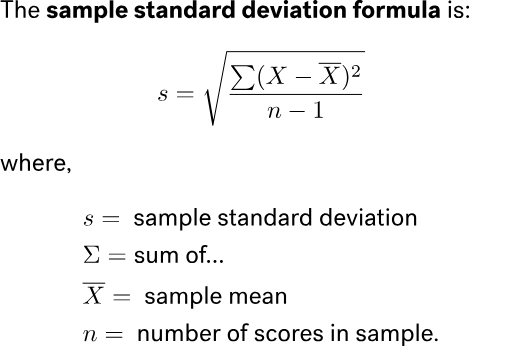

In [12]:
np.var(system_a)**0.5

1.4142135623730951

In [13]:
import math
math.sqrt(np.var(system_a))

1.4142135623730951

In [14]:
math.sqrt(np.var(system_b))

34.058772731852805

# Real Data

In [15]:
dji = yf.download('^DJI', interval='1d', start="2023-08-11", end="2023-10-11")

[*********************100%%**********************]  1 of 1 completed


In [16]:
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,35111.359375,35354.601562,35059.988281,35281.398438,35281.398438,277840000
2023-08-14,35273.890625,35335.449219,35169.968750,35307.628906,35307.628906,300250000
2023-08-15,35219.371094,35219.371094,34908.500000,34946.390625,34946.390625,323920000
2023-08-16,34914.960938,35133.558594,34757.371094,34765.738281,34765.738281,332310000
2023-08-17,34829.609375,34888.480469,34440.730469,34474.828125,34474.828125,392850000


In [17]:
dji['rets'] = np.log(dji['Close']/dji['Close'].shift(1))

In [18]:
dji.tail()

,Open,High,Low,Close,Adj Close,Volume,rets
Date,,,,,,,
2023-10-04,33034.179688,33156.449219,32873.230469,33129.550781,33129.550781,287030000,0.003846
2023-10-05,33099.230469,33174.378906,32941.558594,33119.570312,33119.570312,277250000,-0.000301
2023-10-06,33040.699219,33557.691406,32846.941406,33407.578125,33407.578125,332990000,0.008658
2023-10-09,33259.839844,33631.808594,33253.691406,33604.648438,33604.648438,228760000,0.005882
2023-10-10,33683.410156,33898.218750,33604.320312,33739.300781,33739.300781,255640000,0.003999


<Axes: xlabel='Date'>

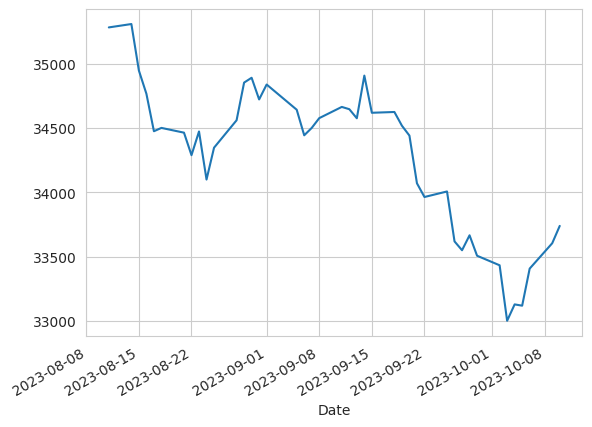

In [21]:
dji['Close'].plot()

In [27]:
var = np.var(dji['rets'])
print(f'Varaince of DJI from 2 month: {var:.7f} ')

Varaince of DJI from 2 month: 0.0000341 


In [29]:
std1 = np.std(dji['rets'])
std2 = math.sqrt(var)
print(f'STD from np.std of DJI from 2 month           : {std1:.7f} ')
print(f'STD from sqrt(variance) of DJI from 2 month: {std2:.7f} ')

STD from np.std of DJI from 2 month           : 0.0058381 
STD from sqrt(variance) of DJI from 2 month: 0.0058381 


## STD period by rolling

In [30]:
dji['rets'].rolling(5).std()

Date
2023-08-11         NaN
2023-08-14         NaN
2023-08-15         NaN
2023-08-16         NaN
2023-08-17         NaN
2023-08-18    0.005104
2023-08-21    0.004687
2023-08-22    0.003636
2023-08-23    0.005305
2023-08-24    0.006144
2023-08-25    0.007462
2023-08-28    0.008097
2023-08-29    0.007998
2023-08-30    0.007946
2023-08-31    0.005495
2023-09-01    0.005117
2023-09-05    0.005861
2023-09-06    0.004259
2023-09-07    0.004385
2023-09-08    0.004473
2023-09-11    0.004295
2023-09-12    0.003439
2023-09-13    0.001963
2023-09-14    0.004451
2023-09-15    0.006531
2023-09-18    0.006409
2023-09-19    0.006540
2023-09-20    0.006550
2023-09-21    0.004550
2023-09-22    0.004136
2023-09-25    0.004419
2023-09-26    0.005608
2023-09-27    0.005633
2023-09-28    0.005717
2023-09-29    0.005813
2023-10-02    0.005413
2023-10-03    0.005983
2023-10-04    0.006901
2023-10-05    0.006262
2023-10-06    0.008082
2023-10-09    0.008479
2023-10-10    0.003275
Name: rets, dtype: float64

<Axes: xlabel='Date'>

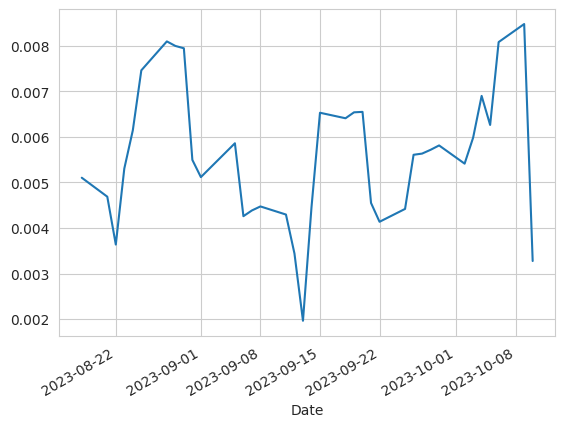

In [31]:
dji['rets'].rolling(5).std().plot()